Online Shoppers Purchasing Intention

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

Uključivanje biblioteka:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import warnings

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn import over_sampling
from imblearn.pipeline import make_pipeline

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate,cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")

Priprema podataka

Ucitavanje podataka:

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Provera i izbacivanje duplikata iz data seta:

In [3]:
print(df.shape)
dups = df.duplicated()
print(dups[dups == True])
data = df.drop_duplicates()
print(data.shape)

(12330, 18)
158      True
159      True
178      True
418      True
456      True
         ... 
11934    True
11938    True
12159    True
12180    True
12185    True
Length: 125, dtype: bool
(12205, 18)


Provera da li postoje null vrednosti

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205,12205
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3329,NaN,NaN,NaN,NaN,10431,9346,10297
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,NaN,2.124211,2.357804,3.153298,4.073904,NaN,NaN,NaN
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,NaN,0.906823,1.710114,2.402340,4.016654,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:

numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                         'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


categorical_columns = ['OperatingSystems', 'VisitorType','Browser', 'Region', 'TrafficType', 'Weekend', 'Month', 'Revenue']

Vizualizacija kategoričkih vičera

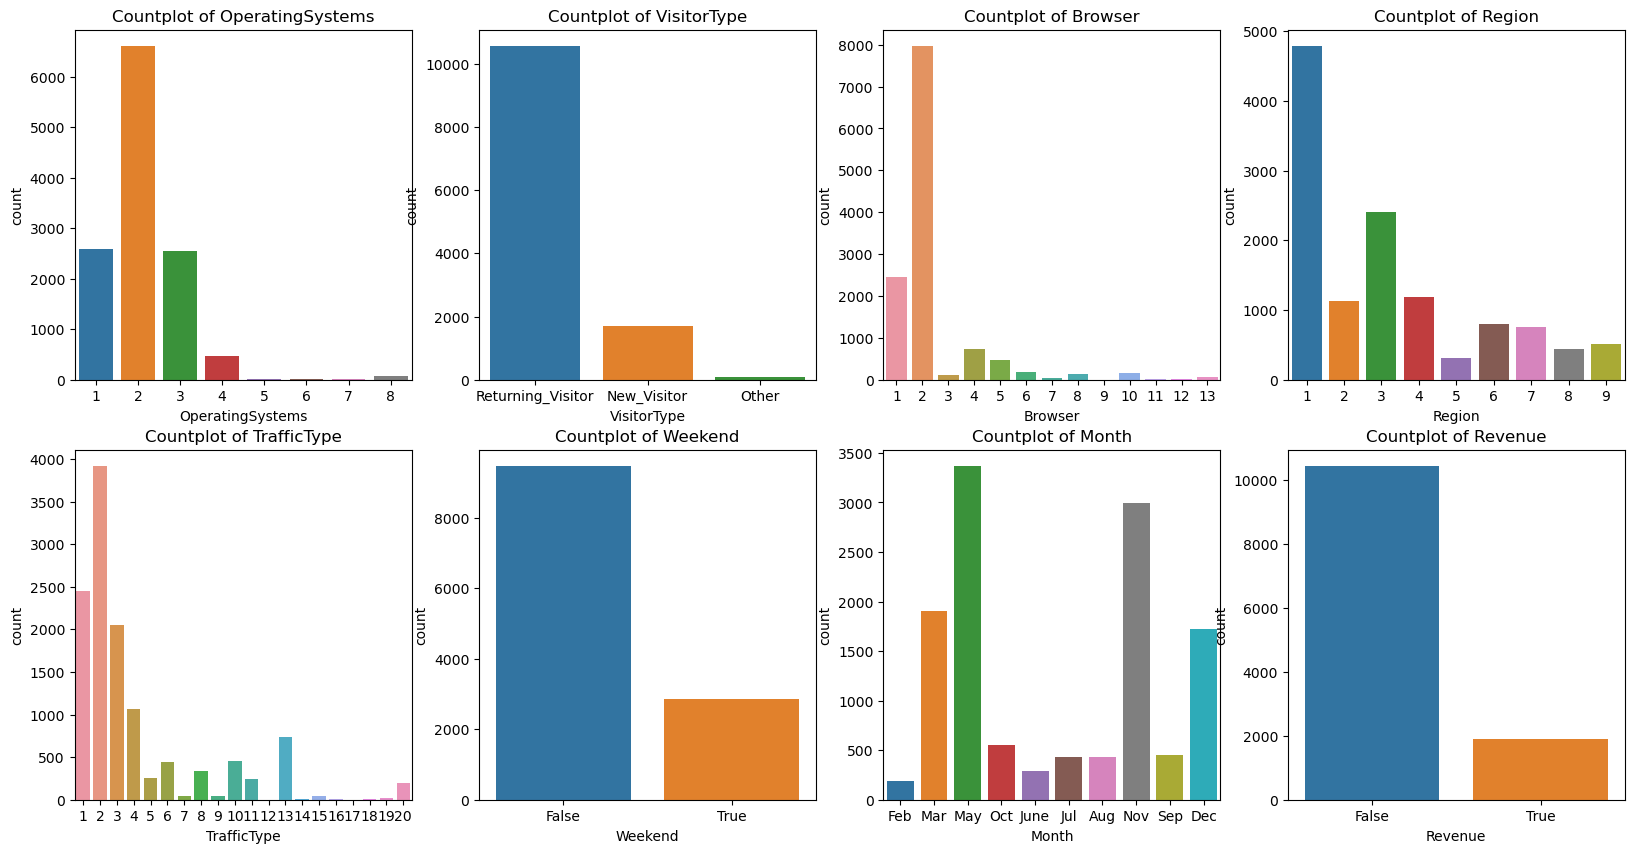

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(categorical_columns):
    sea.countplot(x=feature, data=df, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Countplot of {feature}')
 
plt.show()

Ono sto smo zakljucili na osnovu vizualizacije podataka:
        - Da su nam najveci broj posetilaca Returing Visitor
        - Da nam je radnim danima najveci broj posetilaca
        - Da nam veci broj posetilaca nije izvrsio kupovinu
        - I da maj mesec ima najveci broj posetilaca

Vizalizacija numeričkih fičera

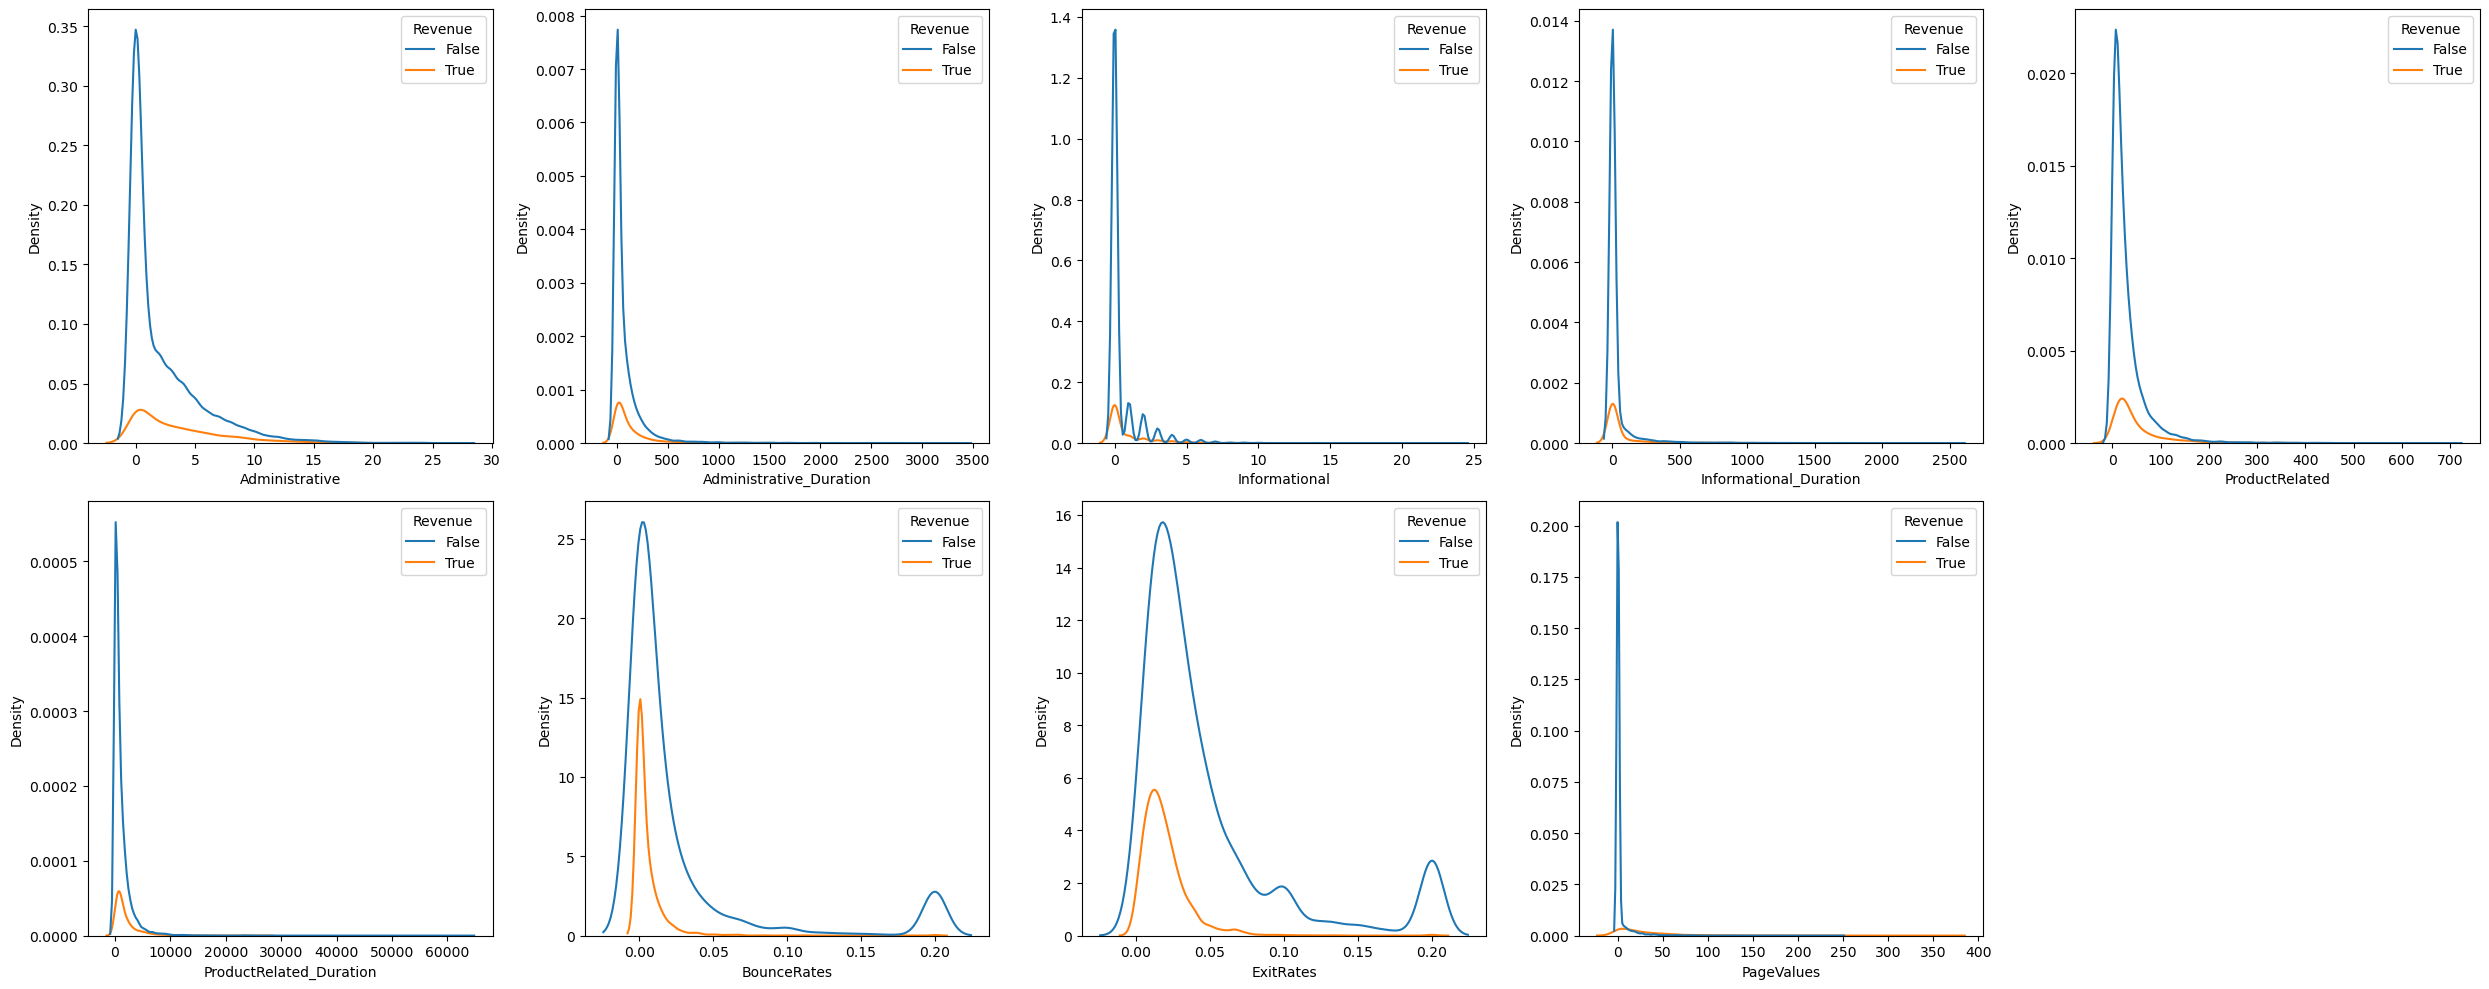

In [8]:
plt.figure(figsize=(25, 10))
for i in range(0, len (numerical_columns)-1):
    plt.subplot(2, 5, i+1)
    sea.kdeplot(x = df[numerical_columns[i]], hue = df['Revenue'])
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

Zakljucili smo da korisnici nemaju tendenciju da posecuju administrativne i informacione stranice.
Takođe smo zaključili da svi feature imaju pozitivnu skew distribuciju.

Encoding kategoričkih feature-a.

In [9]:
label_encoder = LabelEncoder()

data['Month'] = label_encoder.fit_transform(data['Month'])

data['Weekend'] = label_encoder.fit_transform(data['Weekend'])
data['Revenue'] = label_encoder.fit_transform(data['Revenue'])

data = pd.get_dummies(data, columns=['VisitorType'])

data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,1,0,False,False,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,1,0,False,False,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,1,0,False,False,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,0,0,False,False,True


Standardizacija podataka

In [10]:
columns_to_scale = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

scaler = StandardScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,2,1,1,1,1,0,0,False,False,True
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,2,2,2,1,2,0,0,False,False,True
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,2,4,1,9,3,0,0,False,False,True
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,2,3,2,2,4,0,0,False,False,True
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,2,3,3,1,4,1,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.198517,0.356953,-0.398824,-0.246257,0.469915,0.300496,-0.292296,-0.269384,0.337328,-0.31024,1,4,6,1,1,1,0,False,False,True
12326,-0.702302,-0.460019,-0.398824,-0.246257,-0.606516,-0.386155,-0.450137,-0.436133,-0.318962,-0.31024,7,3,2,1,8,1,0,False,False,True
12327,-0.702302,-0.460019,-0.398824,-0.246257,-0.584090,-0.532806,1.391338,0.979209,-0.318962,-0.31024,7,3,2,1,13,1,0,False,False,True
12328,0.498791,-0.037447,-0.398824,-0.246257,-0.382259,-0.448540,-0.450137,-0.442214,-0.318962,-0.31024,7,2,2,3,11,0,0,False,False,True


In [11]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,0.047651,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330,0.025858,-0.019528,-0.020859
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,0.028408,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768,0.023333,-0.007302,-0.021201
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,0.019146,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626,-0.055058,-0.020732,0.058771
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,0.005589,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358,-0.044203,-0.013041,0.046354
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.069523,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042,-0.125823,-0.034843,0.131420
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.060447,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077,-0.119215,-0.025907,0.122881
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,-0.018898,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091,-0.135010,0.018438,0.128156
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,-0.035594,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320,-0.181623,0.026799,0.171942
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.021322,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894,0.103895,0.057582,-0.115154
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.078991,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601,-0.083900,-0.025358,0.088122


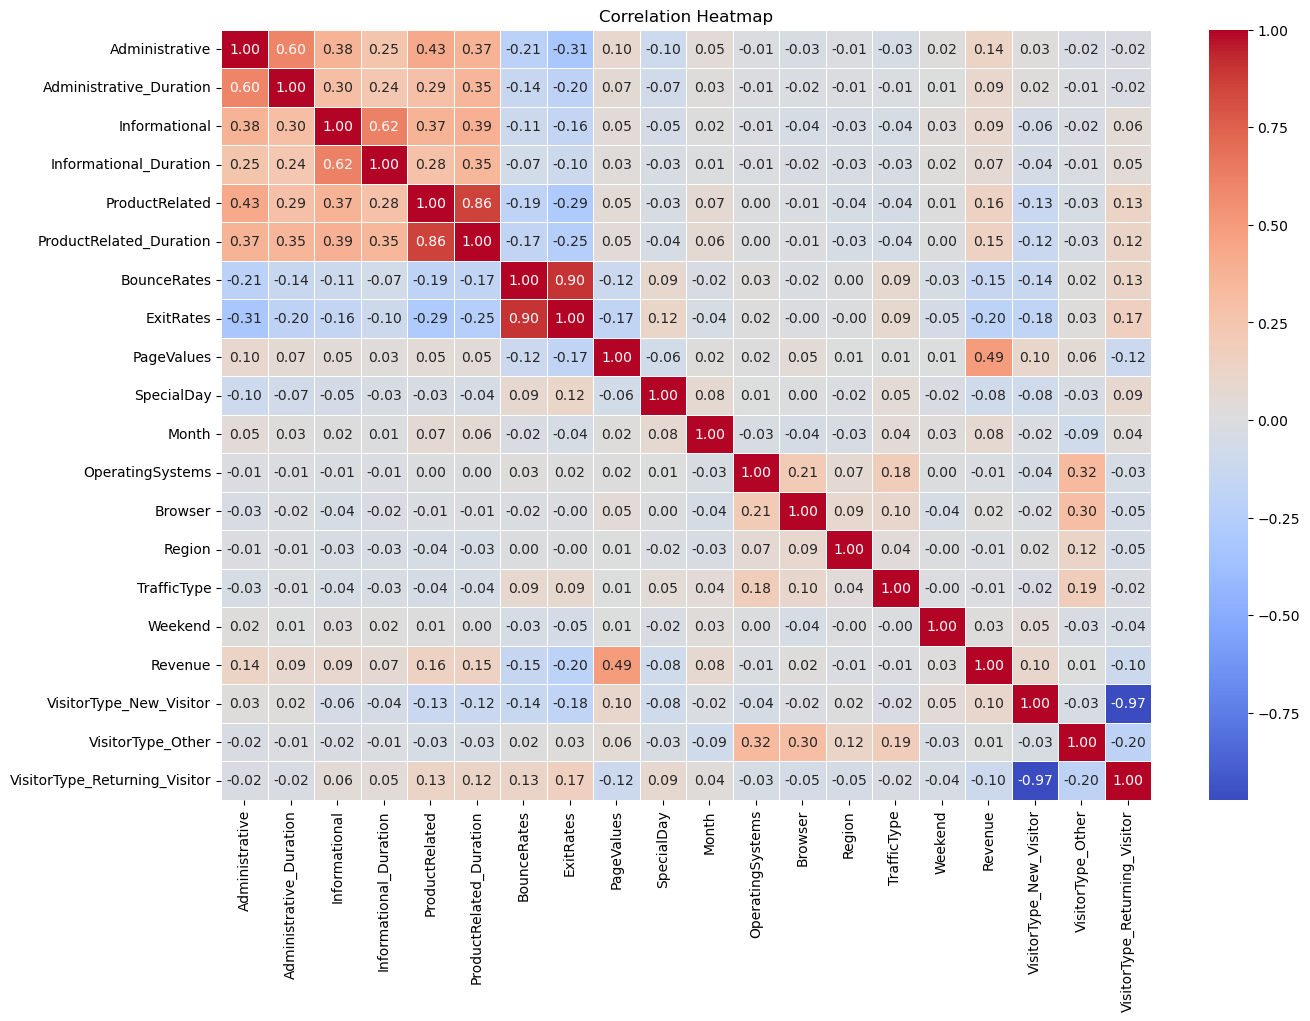

In [12]:
plt.figure(figsize=(15, 10))
heatmap = sea.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Najveću korelaciju sa Revenue ima PageValues (0.49) - što dovodi do zaključka da korisici koji su izvršili kupovinu imaju veću PageValue vrednost.
Najveću vrednost za negativnu korelaciju sa Revenue ima ExitRates (-0.20)
Najveću korelaciju ima BounceRates i ExitRates (0.90) i ProductRelated i ProductRelated_Duration (0.86)

Zbog visoke korelacije izbacili smo BounceRates

In [13]:
data = data.drop('BounceRates', axis=1)
numerical_columns.remove('BounceRates')

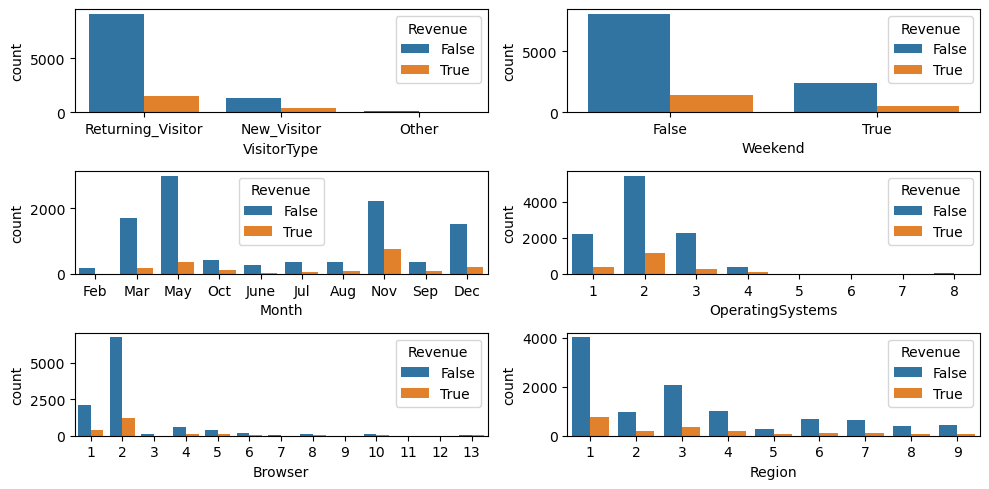

In [14]:
columns = ['VisitorType', 'Weekend', 'Month', 'OperatingSystems', 'Browser', 'Region']

plt.figure(figsize=(10, 5))
for i in range(0, len(columns)):
    plt.subplot (3, 2, i+1)
    sea.countplot(data = df, x = columns[i], hue = 'Revenue')
    plt.tight_layout()

Većina kupaca koji su izvršili kupovinu su:
Visitor Type: Returning Visitor
Weekends: False
Month: Nov
Operating Systems: 2
Browsers: 2
Regions: 1

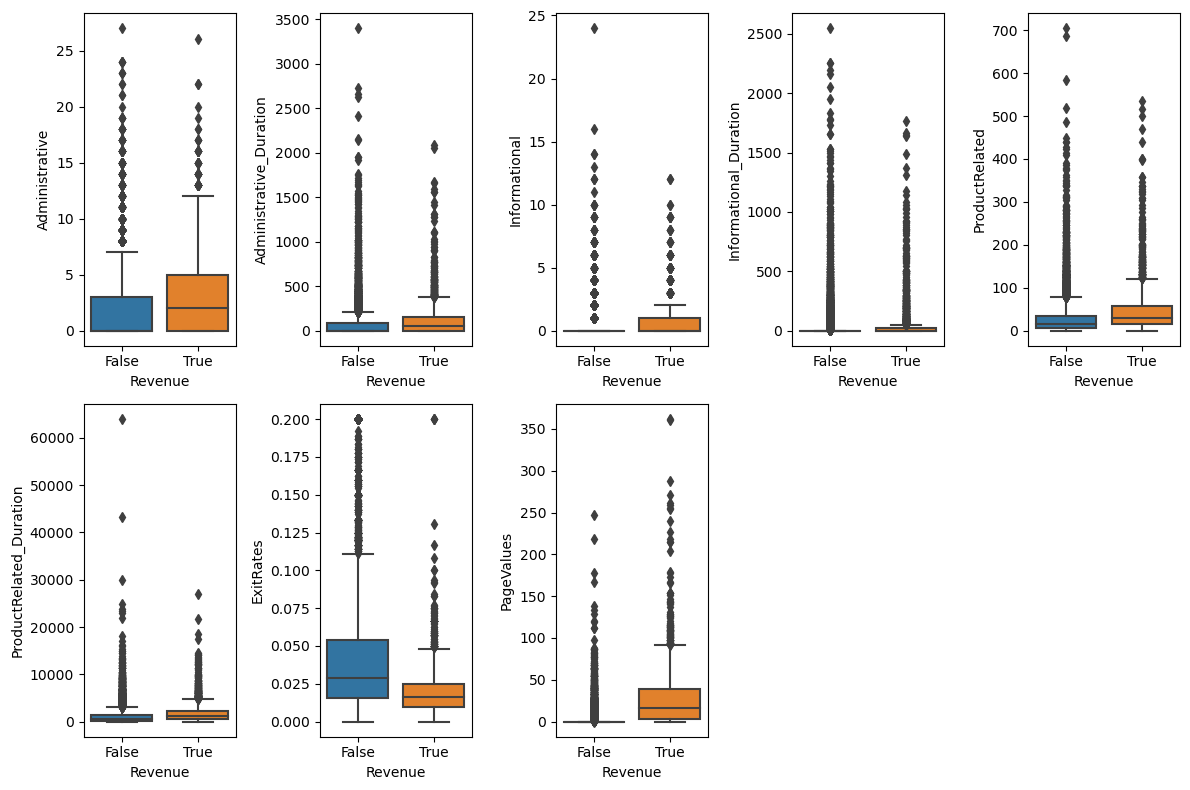

In [15]:
plt.figure(figsize=(12, 8))

for i in range(0, len(numerical_columns)-1):
    plt.subplot(2, 5, i+1)
    sea.boxplot(x = df['Revenue'], y = df[numerical_columns[i]])
    plt.tight_layout()

Na osnovu boxplot smo zaključili da postoji veliki broj outliers-a.

Nalaženje outliers-a primenom z-score metode i iqr metode.
Izbacili smo PageValues i ProductRelatedDuration

In [16]:
numerical_columns_outliers = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                     'ProductRelated', 'ExitRates', 'SpecialDay']

def remove_z_score_outliers(data, numerical_columns, threshold=3):
    z_scores = zscore(data[numerical_columns])
    
    z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)
    
    no_outliers = data[(z_scores_df.abs() <= threshold).all(axis=1)]
    
    return no_outliers

def remove_iqr_outliers(data, numerical_columns, multiplier=1.5):
    q1 = data[numerical_columns].quantile(0.25)
    q3 = data[numerical_columns].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    no_outliers = data[~((data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)).any(axis=1)]
    
    return no_outliers


data_no_z_score_outliers = remove_z_score_outliers(data, numerical_columns_outliers)
data_no_iqr_outliers = remove_iqr_outliers(data, numerical_columns_outliers)

print(data.shape[0] - data_no_z_score_outliers.shape[0])
print(data.shape[0] - data_no_iqr_outliers.shape[0])

1908
5655


Primena algoritama

Spliting podataka i primena SMOTE oversampling zbog nebalansiranosti minority klase
Definisanje algoritama

In [17]:
x = data.drop('Revenue', axis=1)
y = data['Revenue']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_over_smote, y_over_smote = over_sampling.SMOTE(sampling_strategy=0.4).fit_resample(x_train, y_train)
print('Oversampling (SMOTE)')
print(pd.Series(y_over_smote).value_counts())


x_o = data_no_z_score_outliers.drop('Revenue', axis=1)
y_o = data_no_z_score_outliers['Revenue']

x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(x_o, y_o, test_size=0.2, random_state=1)

x_over_smote_o, y_over_smote_o = over_sampling.SMOTE(sampling_strategy=0.4).fit_resample(x_train_o, y_train_o)
print('Oversampling (SMOTE) no outliers')
print(pd.Series(y_over_smote_o).value_counts())

algorithms = [
    ('Random Forest', RandomForestClassifier(random_state=1)),
    ('SVC', SVC(kernel='linear', random_state=1, probability=True)),
    ('Logistic Regression', LogisticRegression(random_state=1)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=1)),
    ('XGBoost', xgb.XGBClassifier(random_state=1))
]

Oversampling (SMOTE)
Revenue
0    8265
1    3306
Name: count, dtype: int64
Oversampling (SMOTE) no outliers
Revenue
0    6924
1    2769
Name: count, dtype: int64


Cross-validation

In [18]:
columns = ["Algorithm", "AUC_cros", "Accuracy_cross", "F1_cross", "Precision_cross", "Recall_cross", "AUC_test", "Accuracy_test", "F1_test"]
results = pd.DataFrame(
        columns=columns
    )
results.set_index("Algorithm", inplace=True)

resultsWithOutOutliers = pd.DataFrame(
        columns=columns
    )
resultsWithOutOutliers.set_index("Algorithm", inplace=True)

pd.set_option('display.max_colwidth', None)

def cross_validate_algorithm(x, y, results, algorithms=algorithms):
    for name, model in algorithms:
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        scoring_metrics = ['accuracy','f1','roc_auc','precision','recall']

        #smote
        smote_pipe = make_pipeline(over_sampling.SMOTE(sampling_strategy=0.4), model)

        cv_results = cross_validate(smote_pipe, x, y, cv=kf, scoring=scoring_metrics)

        results.loc[name, 'F1_cross'] = cv_results['test_f1'].mean()
        results.loc[name, 'AUC_cros'] = cv_results['test_roc_auc'].mean()
        results.loc[name, 'Accuracy_cross'] = cv_results['test_accuracy'].mean()
        results.loc[name, 'Precision_cross'] = cv_results['test_precision'].mean()
        results.loc[name, 'Recall_cross'] = cv_results['test_recall'].mean()


cross_validate_algorithm(x_train, y_train, results)


cross_validate_algorithm(x_train_o, y_train_o, resultsWithOutOutliers)


print("\nResults:\n")
display(results)
print("\nResults with out outliers:\n")
display(resultsWithOutOutliers)
pd.reset_option('display.max_colwidth')


Results:



,AUC_cros,Accuracy_cross,F1_cross,Precision_cross,Recall_cross,AUC_test,Accuracy_test,F1_test
Algorithm,,,,,,,,
Random Forest,0.921042,0.894306,0.663249,0.649421,0.678444,NaN,NaN,NaN
SVC,0.890598,0.889083,0.610244,0.662939,0.566384,NaN,NaN,NaN
Logistic Regression,0.877748,0.886011,0.583249,0.665717,0.519683,NaN,NaN,NaN
KNN,0.781938,0.838387,0.495022,0.476524,0.515686,NaN,NaN,NaN
Decision Tree,0.753777,0.857744,0.565871,0.53266,0.603744,NaN,NaN,NaN
XGBoost,0.915734,0.892975,0.646357,0.656176,0.637101,NaN,NaN,NaN



Results with out outliers:



,AUC_cros,Accuracy_cross,F1_cross,Precision_cross,Recall_cross,AUC_test,Accuracy_test,F1_test
Algorithm,,,,,,,,
Random Forest,0.920454,0.897535,0.682827,0.674504,0.692323,NaN,NaN,NaN
SVC,0.887275,0.894742,0.6507,0.691878,0.614626,NaN,NaN,NaN
Logistic Regression,0.882721,0.889643,0.610182,0.698462,0.542263,NaN,NaN,NaN
KNN,0.794219,0.842054,0.513242,0.504428,0.52246,NaN,NaN,NaN
Decision Tree,0.763732,0.856986,0.583095,0.545593,0.626831,NaN,NaN,NaN
XGBoost,0.920573,0.894379,0.663758,0.674432,0.654262,NaN,NaN,NaN


Train and predict on algorithms

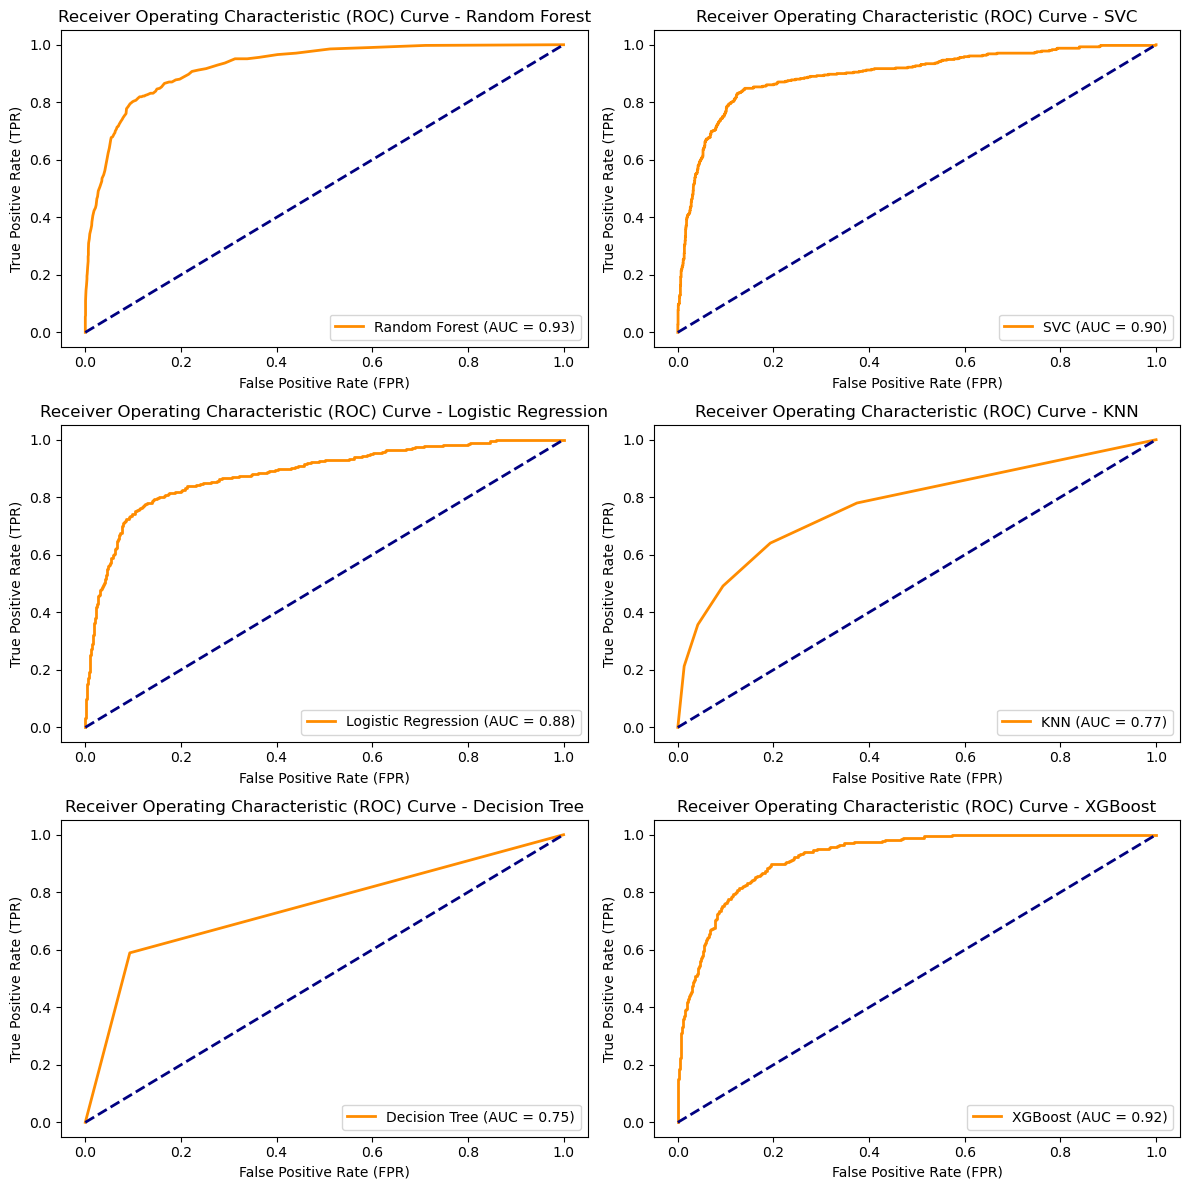

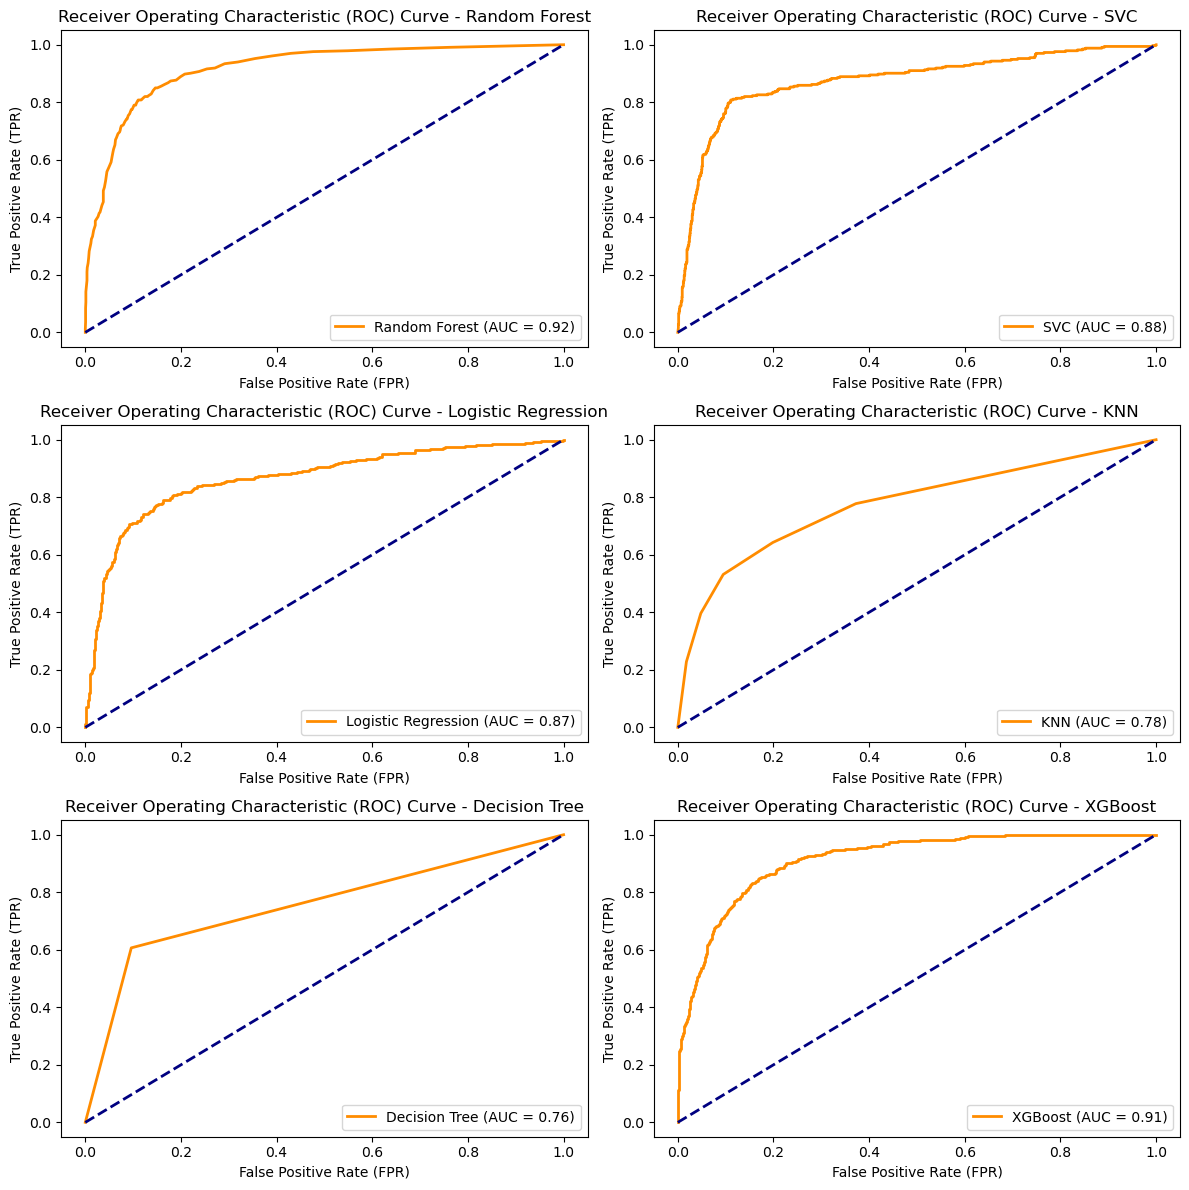


Results:



,AUC_cros,Accuracy_cross,F1_cross,Precision_cross,Recall_cross,AUC_test,Accuracy_test,F1_test
Algorithm,,,,,,,,
Random Forest,0.921042,0.894306,0.663249,0.649421,0.678444,0.925608,0.897173,0.693529
SVC,0.890598,0.889083,0.610244,0.662939,0.566384,0.895947,0.894306,0.647541
Logistic Regression,0.877748,0.886011,0.583249,0.665717,0.519683,0.882064,0.884064,0.598582
KNN,0.781938,0.838387,0.495022,0.476524,0.515686,0.773174,0.836133,0.501247
Decision Tree,0.753777,0.857744,0.565871,0.53266,0.603744,0.748115,0.853748,0.574493
XGBoost,0.915734,0.892975,0.646357,0.656176,0.637101,0.924457,0.88857,0.654822



Results with out outliers:



,AUC_cros,Accuracy_cross,F1_cross,Precision_cross,Recall_cross,AUC_test,Accuracy_test,F1_test
Algorithm,,,,,,,,
Random Forest,0.920454,0.897535,0.682827,0.674504,0.692323,0.916988,0.891262,0.678161
SVC,0.887275,0.894742,0.6507,0.691878,0.614626,0.876002,0.892233,0.649842
Logistic Regression,0.882721,0.889643,0.610182,0.698462,0.542263,0.866148,0.883495,0.605263
KNN,0.794219,0.842054,0.513242,0.504428,0.52246,0.775371,0.84466,0.525223
Decision Tree,0.763732,0.856986,0.583095,0.545593,0.626831,0.755243,0.855825,0.57632
XGBoost,0.920573,0.894379,0.663758,0.674432,0.654262,0.913459,0.88301,0.636501


In [19]:
def test_algorithm(x_smote,x_test,y_smote,y_test,results, algorithms=algorithms):
    num_algorithms = len(algorithms)
    num_rows = int(np.ceil(num_algorithms / 2))
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    axes = axes.flatten()
    for i, (name, model) in enumerate(algorithms):
        model.fit(x_smote, y_smote)
        
        # Make predictions
        pred = model.predict(x_test)

        y_scores = model.predict_proba(x_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        ax = axes[i]
        ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.set_title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        ax.legend(loc='lower right')

        results.loc[name, 'Accuracy_test'] = accuracy_score(y_test, pred)
        results.loc[name, 'F1_test'] = f1_score(y_test, pred)
        results.loc[name, 'AUC_test'] = roc_auc

    plt.tight_layout()
    plt.show()

test_algorithm(x_over_smote,x_test, y_over_smote, y_test, results)

test_algorithm(x_over_smote_o,x_test_o, y_over_smote_o, y_test_o, resultsWithOutOutliers)

print("\nResults:\n")
display(results)
print("\nResults with out outliers:\n")
display(resultsWithOutOutliers)
pd.reset_option('display.max_colwidth')


In [32]:
from sklearn.ensemble import VotingClassifier
classifier1 = LogisticRegression(random_state=10)
classifier2 = RandomForestClassifier(random_state=10)
classifier3 = xgb.XGBClassifier(random_state=10)

# Create a VotingClassifier with hard voting
voting_clf_hard = VotingClassifier(estimators=[('lr', classifier1), ('dt', classifier2), ('xgb', classifier3)], voting='hard')

# Create a VotingClassifier with soft voting
voting_clf_soft = VotingClassifier(estimators=[('lr', classifier1), ('dt', classifier2), ('xgb', classifier3)], voting='soft')

# Fit the VotingClassifiers on the training data
voting_clf_hard.fit(x_over_smote, y_over_smote)
voting_clf_soft.fit(x_over_smote, y_over_smote)

# Make predictions on the test set
y_pred_hard = voting_clf_hard.predict(x_test)
y_pred_soft = voting_clf_soft.predict(x_test)

# Evaluate the performance of the VotingClassifiers
accuracy_hard = accuracy_score(y_test, y_pred_hard)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print("Hard Voting Classifier Accuracy:", accuracy_hard)
print("Soft Voting Classifier Accuracy:", accuracy_soft)

Hard Voting Classifier Accuracy: 0.8951249487914789
Soft Voting Classifier Accuracy: 0.8947152806226956


In [33]:
from sklearn.ensemble import BaggingClassifier

base_classifier1 = RandomForestClassifier(random_state=10)
base_classifier2 = xgb.XGBClassifier(random_state=10)

# Create a BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier1, n_estimators=10, random_state=10)

# Fit the BaggingClassifier on the training data
bagging_classifier.fit(x_over_smote, y_over_smote)

# Make predictions on the test set
y_pred_bagging = bagging_classifier.predict(x_test)

# Evaluate the performance of the BaggingClassifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

Bagging Classifier Accuracy: 0.8959442851290454


Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(x_over_smote, y_over_smote)

print(grid_search.best_params_) 
grid_predictions = grid_search.predict(x_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2032
           1       0.69      0.69      0.69       409

    accuracy                           0.90      2441
   macro avg       0.82      0.82      0.82      2441
weighted avg       0.90      0.90      0.90      2441



In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(x_over_smote_o, y_over_smote_o)

print(grid_search.best_params_) 
grid_predictions = grid_search.predict(x_test_o) 
   
# print classification report 
print(classification_report(y_test_o, grid_predictions)) 

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1727
           1       0.65      0.71      0.68       333

    accuracy                           0.89      2060
   macro avg       0.80      0.82      0.81      2060
weighted avg       0.90      0.89      0.89      2060



In [25]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001], 
    'n_estimators': [100, 500, 1000]
    }
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(x_over_smote, y_over_smote)
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(x_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'learning_rate': 0.1, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2032
           1       0.67      0.59      0.63       409

    accuracy                           0.88      2441
   macro avg       0.80      0.77      0.78      2441
weighted avg       0.88      0.88      0.88      2441



In [26]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001], 
    'n_estimators': [100, 500, 1000]
    }
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(x_over_smote_o, y_over_smote_o)
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(x_test_o) 
   
# print classification report 
print(classification_report(y_test_o, grid_predictions)) 

{'learning_rate': 0.1, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1727
           1       0.64      0.64      0.64       333

    accuracy                           0.88      2060
   macro avg       0.79      0.79      0.79      2060
weighted avg       0.88      0.88      0.88      2060



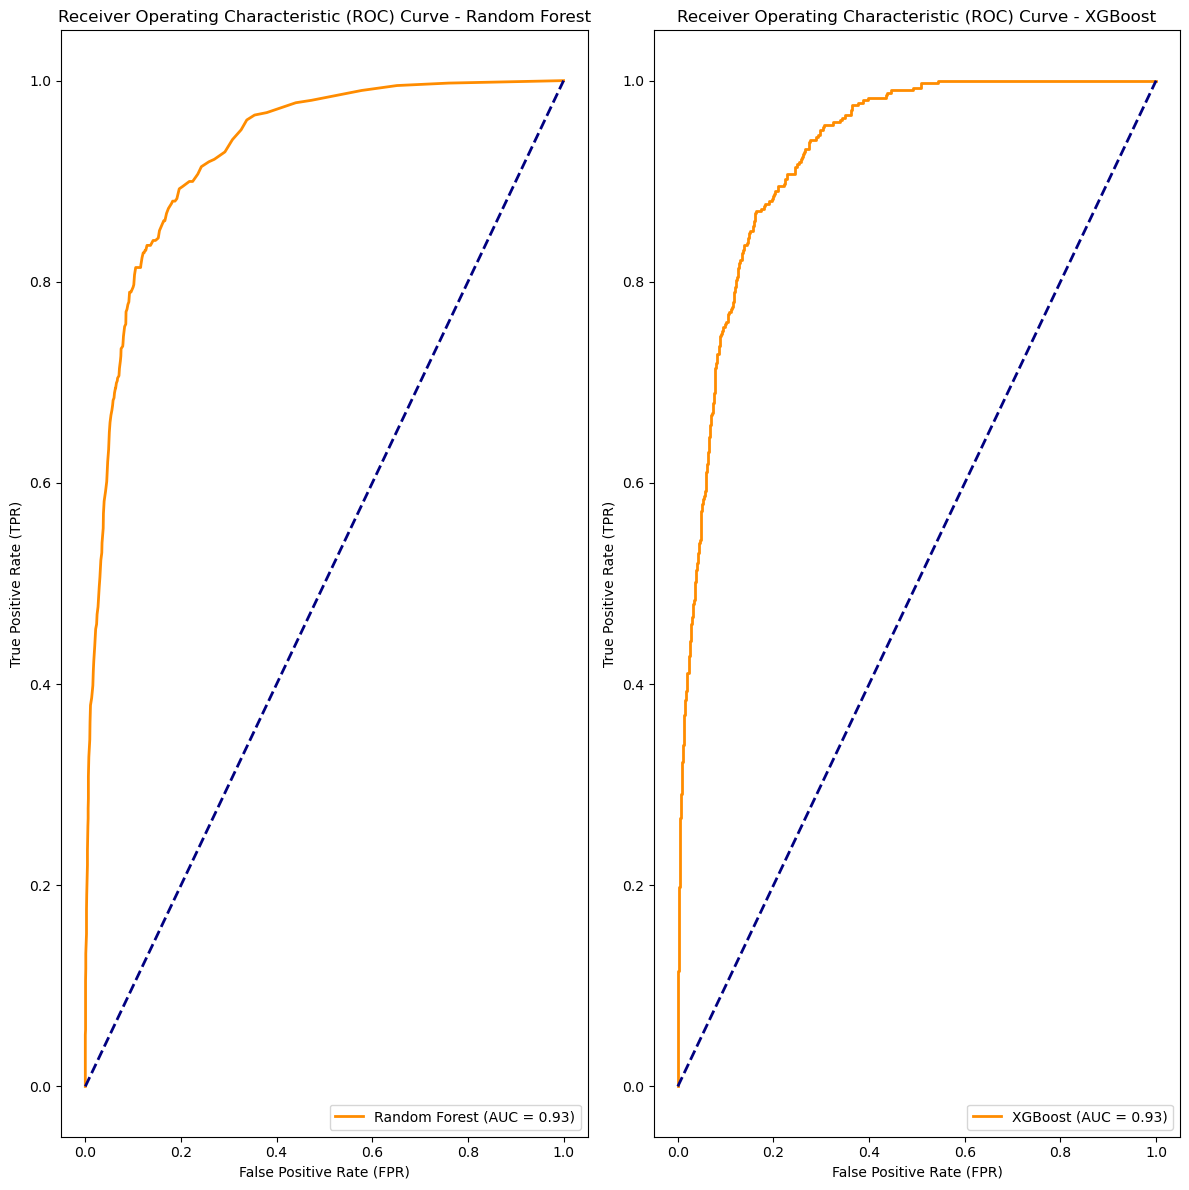

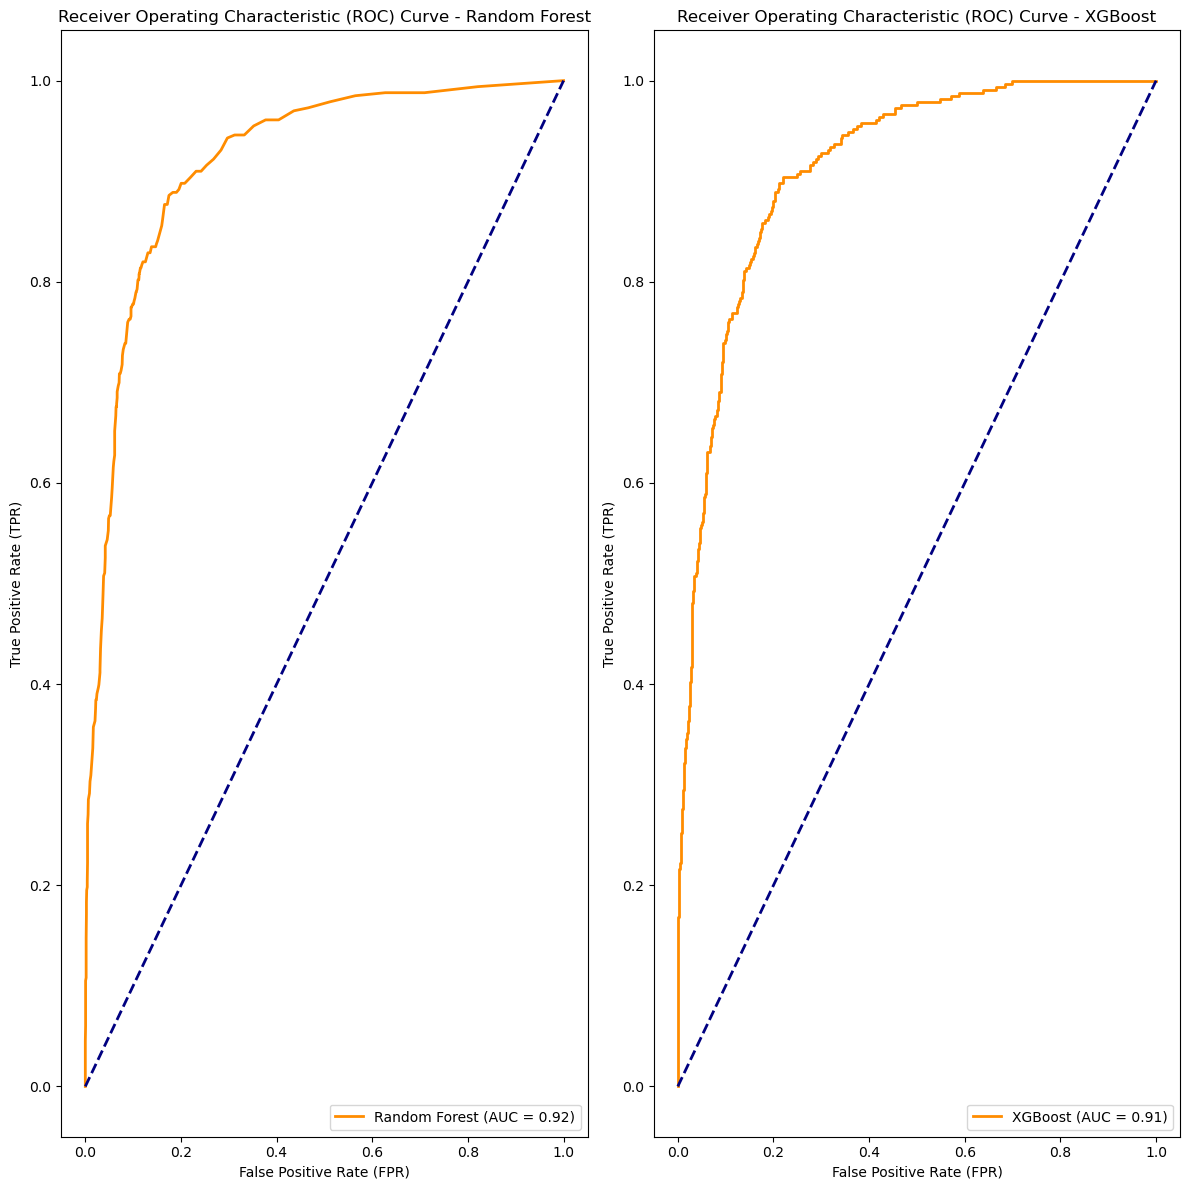


Results:



,AUC_test,Accuracy_test,F1_test
Algorithm,,,
Random Forest,0.926895,0.896354,0.691839
XGBoost,0.925217,0.883245,0.629389



Results with out outliers:



,AUC_test,Accuracy_test,F1_test
Algorithm,,,
Random Forest,0.918569,0.891748,0.679137
XGBoost,0.91317,0.883495,0.63964


In [27]:
algorithmsOpt = [
    ('Random Forest', RandomForestClassifier(max_depth=None,min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=1)),
    ('XGBoost', xgb.XGBClassifier(learning_rate=0.1, n_estimators=500,  random_state=1))
]

col = ["Algorithm", "AUC_test", "Accuracy_test", "F1_test"]
res = pd.DataFrame(
        columns=col
    )
res.set_index("Algorithm", inplace=True)

resWithOutOutliers = pd.DataFrame(
        columns=col
    )
resWithOutOutliers.set_index("Algorithm", inplace=True)

pd.set_option('display.max_colwidth', None)

test_algorithm(x_over_smote,x_test, y_over_smote, y_test, res, algorithms=algorithmsOpt)

test_algorithm(x_over_smote_o,x_test_o, y_over_smote_o, y_test_o, resWithOutOutliers, algorithms=algorithmsOpt)

print("\nResults:\n")
display(res)
print("\nResults with out outliers:\n")
display(resWithOutOutliers)
pd.reset_option('display.max_colwidth')


Feature importance

Administrative                   0.065063
Administrative_Duration          0.053981
Informational                    0.018831
Informational_Duration           0.019157
ProductRelated                   0.066976
ProductRelated_Duration          0.076748
ExitRates                        0.085760
PageValues                       0.453277
SpecialDay                       0.002512
Month                            0.040289
OperatingSystems                 0.016854
Browser                          0.016243
Region                           0.026232
TrafficType                      0.026740
Weekend                          0.008384
VisitorType_New_Visitor          0.014226
VisitorType_Other                0.000345
VisitorType_Returning_Visitor    0.008383
dtype: float64


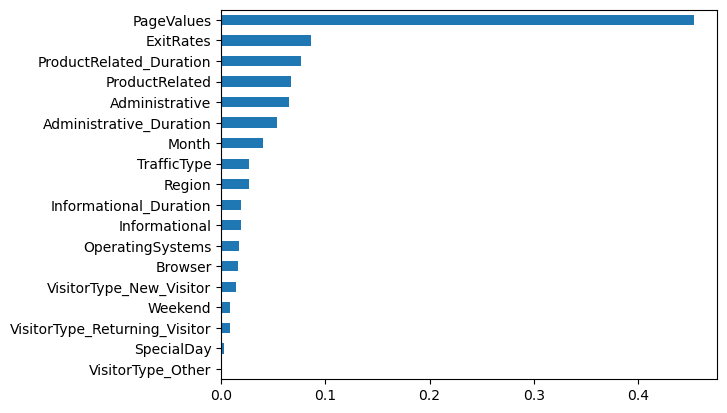

In [23]:

model=RandomForestClassifier(max_depth=None,min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=1)

model.fit(x_over_smote_o,y_over_smote_o)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
print(feat_importances)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()

Administrative                   0.065063
Administrative_Duration          0.053981
Informational                    0.018831
Informational_Duration           0.019157
ProductRelated                   0.066976
ProductRelated_Duration          0.076748
ExitRates                        0.085760
PageValues                       0.453277
SpecialDay                       0.002512
Month                            0.040289
OperatingSystems                 0.016854
Browser                          0.016243
Region                           0.026232
TrafficType                      0.026740
Weekend                          0.008384
VisitorType_New_Visitor          0.014226
VisitorType_Other                0.000345
VisitorType_Returning_Visitor    0.008383
dtype: float64


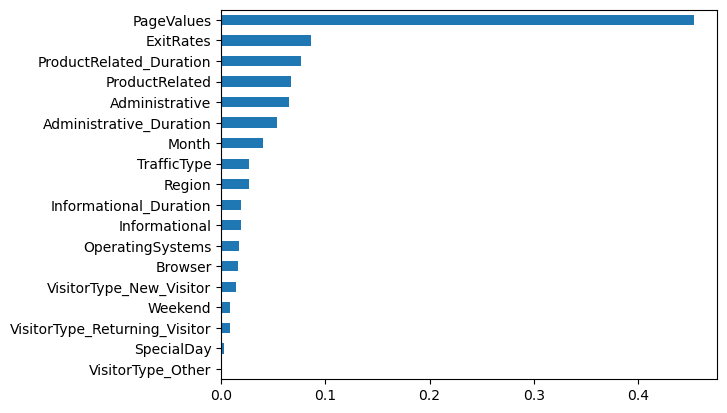

In [28]:
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=500,  random_state=1)
model.fit(x_over_smote_o,y_over_smote_o)

# Get feature importance scores
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
print(feat_importances)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()

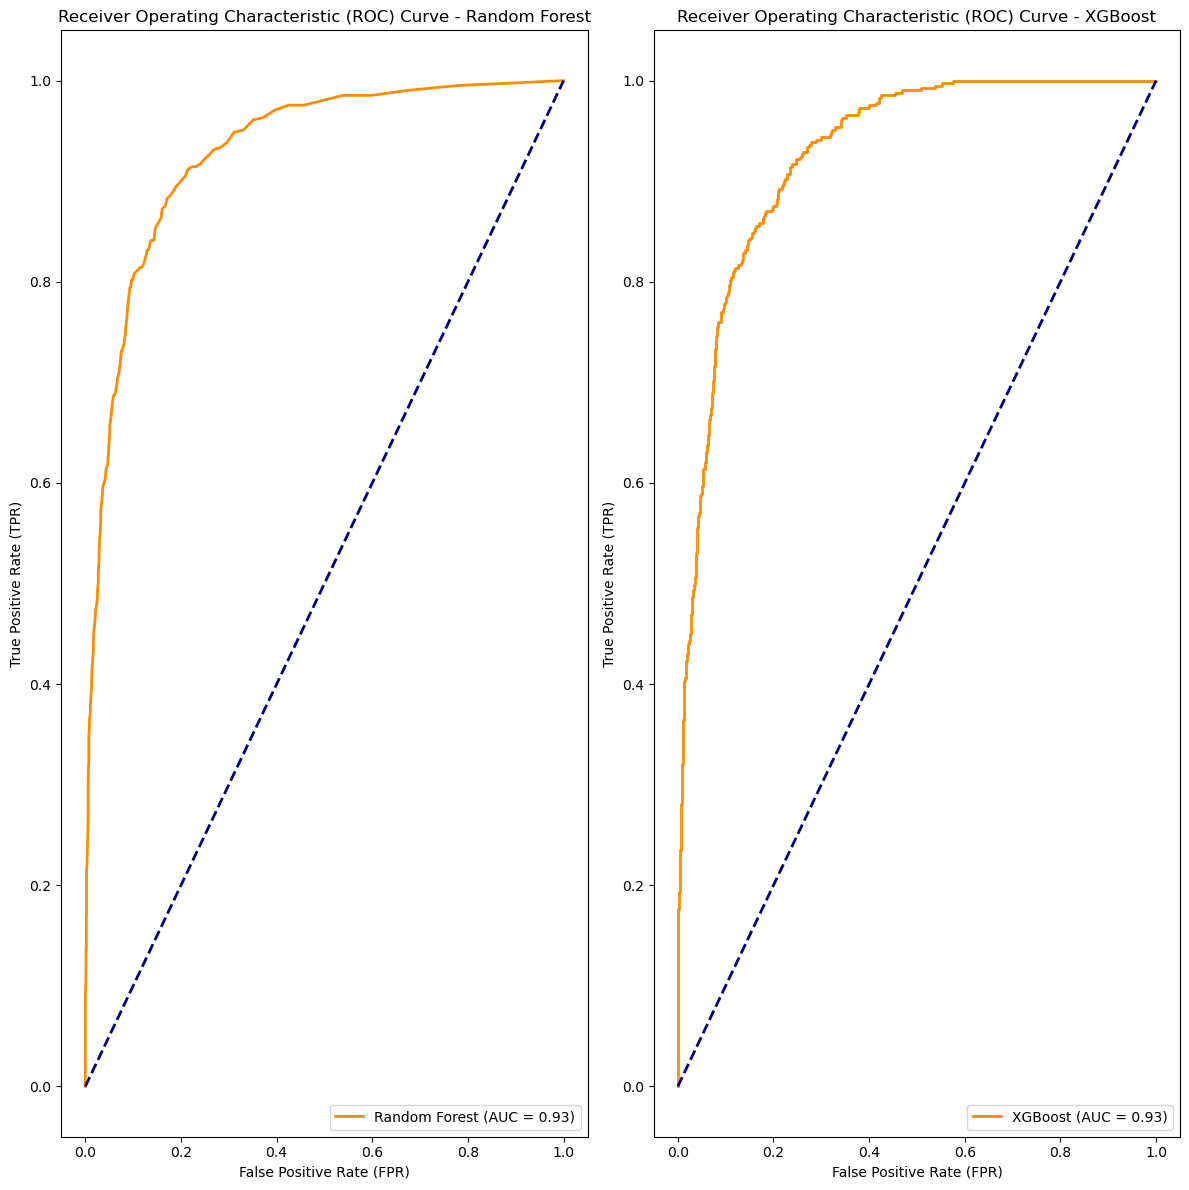

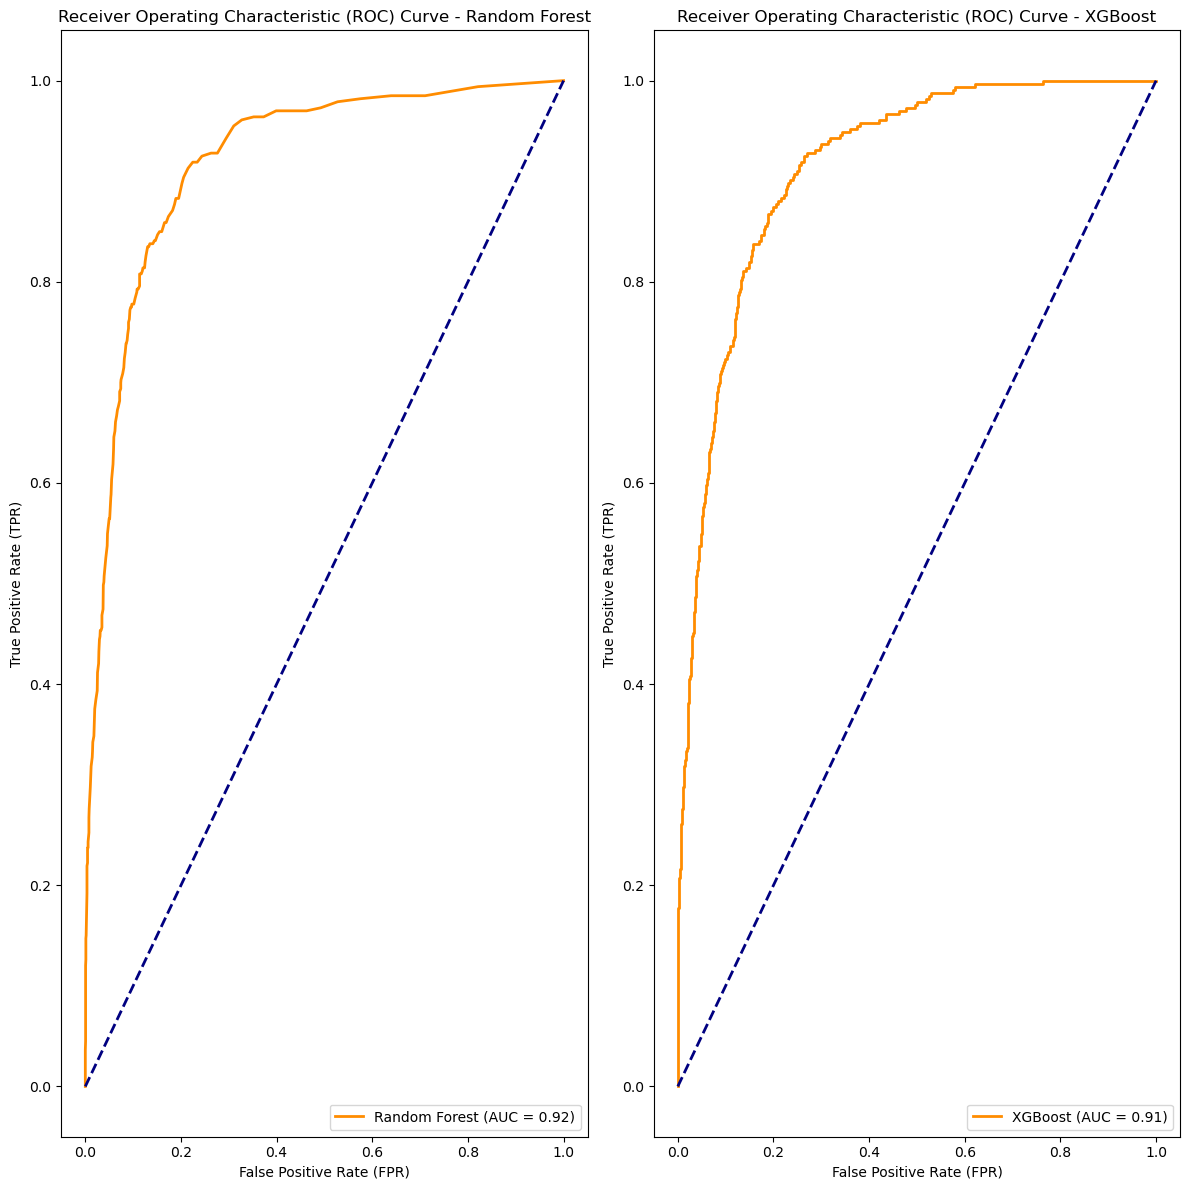


Results:



,AUC_test,Accuracy_test,F1_test
Algorithm,,,
Random Forest,0.9274,0.898402,0.693827
XGBoost,0.925969,0.88857,0.653061



Results with out outliers:



,AUC_test,Accuracy_test,F1_test
Algorithm,,,
Random Forest,0.918756,0.88835,0.66763
XGBoost,0.913264,0.884466,0.638298


In [29]:
feat_reducted = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'Administrative', 'Administrative_Duration', 'Month', 
                 'TrafficType', 'Region','Informational_Duration', 'Informational', 'OperatingSystems', 'Browser', 'VisitorType_New_Visitor']


resReducted = pd.DataFrame(
        columns=col
    )
resReducted.set_index("Algorithm", inplace=True)

resReductedWithOutOutliers = pd.DataFrame(
        columns=col
    )
resReductedWithOutOutliers.set_index("Algorithm", inplace=True)

pd.set_option('display.max_colwidth', None)

test_algorithm(x_over_smote[feat_reducted],x_test[feat_reducted], y_over_smote, y_test, resReducted, algorithms=algorithmsOpt)

test_algorithm(x_over_smote_o[feat_reducted],x_test_o[feat_reducted], y_over_smote_o, y_test_o, resReductedWithOutOutliers, algorithms=algorithmsOpt)

print("\nResults:\n")
display(resReducted)
print("\nResults with out outliers:\n")
display(resReductedWithOutOutliers)
pd.reset_option('display.max_colwidth')



Zaključak analize namere online kupaca na osnovu skupa podataka koji obuhvata 12.330 sesija pružio je dobar data set za analizu. Skup podataka, sa 10 numeričkih i 8 kategoričkih atributa, bio je usmeren na predviđanje "Revenue" label klase, što ukazuje da li je korisnik obavio kupovinu.

Distribucija klasa otkrila je da većina sesija (84,5%) nije rezultirala kupovinom, dok su preostale sesije (15,5%) završile kupovinom. Atributi su obuhvatali različite aspekte, kao što su broj posećenih stranica, vreme provedeno na različitim kategorijama stranica, stopa napuštanja, stopa izlaska, vrednost stranice, indikatori posebnih dana i još mnogo toga, pružajući sveobuhvatan uvid u ponašanje korisnika.

Dva algoritma koja su se istakla su Random Forest i XGBoost. Rezultati su pokazali da oba algoritma daju korektne rezultate, pri čemu je Random Forest postigao AUC od 0,927, a XGBoost AUC od 0,926 i accuracy 0.88-0.90 na testnom skupu.

Dodatno, sprovedena je analiza isključujući outliers vrednosti, otkrivajući nešto niže metrike performansi, ali ipak davajući dobar nivo prediktivne tačnosti. Ovo ukazuje na to da su modeli relativno otporni na outliers vrednosti i dobro generalizuju na različite podskupove podataka.

U praktičnom smislu, razvijeni modeli mogu biti vredni e-commerce platformama u predviđanju namera korisnika za kupovinu. Uvidi iz ovog istraživanja mogu pomoći preduzećima da optimizuju svoje web sajtove, marketinške strategije i interakcije sa korisnicima, unapređujući ukupno iskustvo online kupovine.